<a href="https://colab.research.google.com/github/jhsam007/TSF-GRIP-TASK-6/blob/main/Prediction_Using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE SPARKS FOUNDATION GRIP: Data Science & Business Analytics Intern
# Name: Jahid Hasan
# Task 6: Prediction Using Decision Tree Algorithm
# Batch: GRIP_SEPTEMBER22

In [108]:
# Importing libraries
import numpy as np
import pandas as pd
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
pd.set_option('display.max_columns',None)
%matplotlib inline

In [83]:
df = pd.read_csv('Iris.csv')

In [84]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [85]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [86]:
df.shape

(150, 6)

In [87]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [88]:
# Correlation between features
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


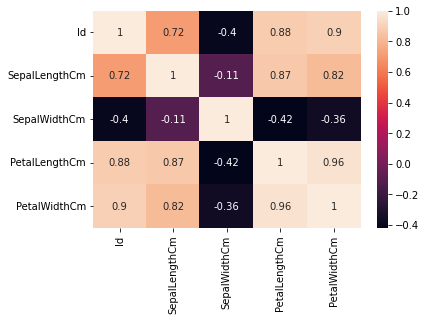

In [89]:
sns.heatmap(df.corr(),annot=True)
plt.show()

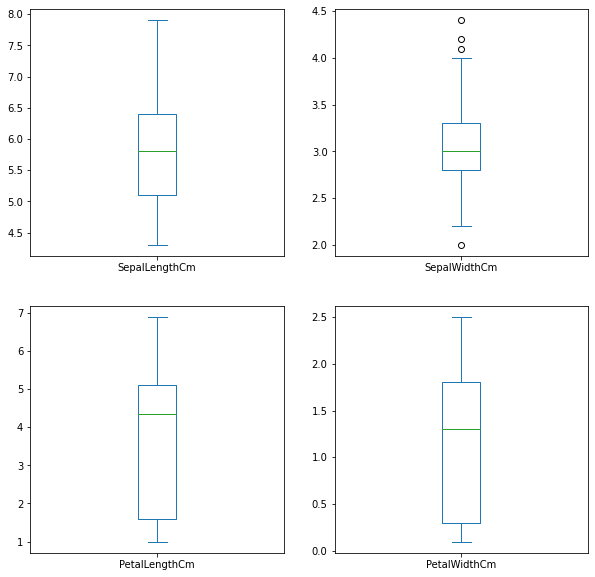

In [90]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
df['SepalLengthCm'].plot.box()
plt.subplot(2,2,2)
df['SepalWidthCm'].plot.box()
plt.subplot(2,2,3)
df['PetalLengthCm'].plot.box()
plt.subplot(2,2,4)
df['PetalWidthCm'].plot.box()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

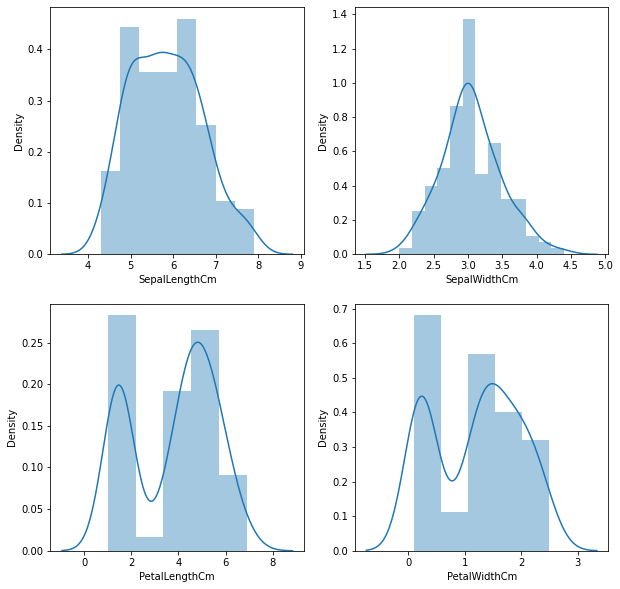

In [91]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['SepalLengthCm'])
plt.subplot(2,2,2)
sns.distplot(df['SepalWidthCm'])
plt.subplot(2,2,3)
sns.distplot(df['PetalLengthCm'])
plt.subplot(2,2,4)
sns.distplot(df['PetalWidthCm'])
plt.show()

In [92]:
df.drop('Id',axis=1,inplace=True)

In [93]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [94]:
upper_boundary = df.SepalWidthCm.mean() + 3*df.SepalWidthCm.std()
lower_boundary = df.SepalWidthCm.mean() - 3*df.SepalWidthCm.std()
print(f'Suppose the data greater than {lower_boundary} and lesser than {upper_boundary}')

Suppose the data greater than 1.7532170659134791 and lesser than 4.354782934086521


In [95]:
upper_outlier = df[df['SepalWidthCm'] > upper_boundary].index
df.drop(upper_outlier,inplace = True)
lower_outlier = df[df['SepalWidthCm'] < lower_boundary].index
df.drop(lower_outlier,inplace = True)
df.shape

(149, 5)

In [96]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 365, stratify = Y)

In [98]:
np.unique(Y_train,return_counts = True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([39, 40, 40]))

In [99]:
np.unique(Y_test,return_counts = True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([10, 10, 10]))

In [100]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [101]:
classifier = DecisionTreeClassifier()
grid = GridSearchCV(estimator = classifier, param_grid = {'ccp_alpha':[0.0001,0.001,0.01,0.1,1]},
                    scoring = 'precision', n_jobs = -1)
grid.fit(X_train,Y_train)
grid.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  category=UserWarning,


{'ccp_alpha': 0.0001}

In [102]:
classifier = DecisionTreeClassifier(ccp_alpha = 0.0001)
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0001)

In [103]:
print(tree.export_text(model))

|--- feature_2 <= -0.75
|   |--- class: Iris-setosa
|--- feature_2 >  -0.75
|   |--- feature_3 <= 0.72
|   |   |--- feature_2 <= 0.73
|   |   |   |--- feature_0 <= -1.07
|   |   |   |   |--- feature_3 <= 0.19
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_3 >  0.19
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_0 >  -1.07
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  0.73
|   |   |   |--- feature_0 <= 0.22
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  0.22
|   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  0.72
|   |   |--- class: Iris-virginica



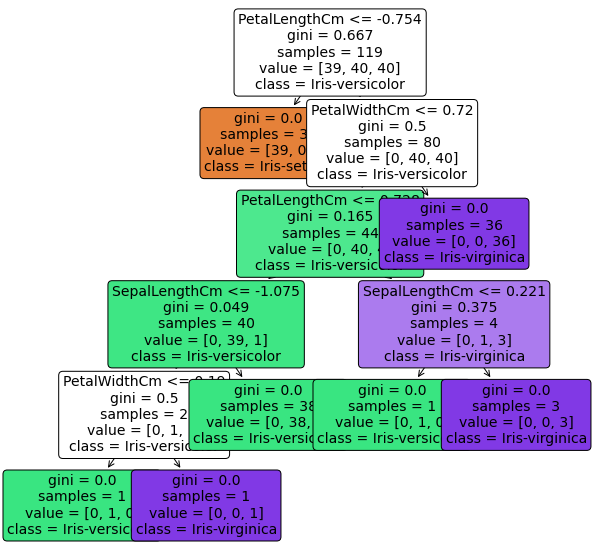

In [104]:
# Plotting Decision Tree
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(model, 
                   feature_names=df.columns[:-1],  
                   class_names=df.Species.unique(),rounded=True,filled=True,fontsize=14)
plt.savefig('tree.png',format='png',bbox_inches = "tight")

In [105]:
#Evaluation
Y_pred = classifier.predict(X_test)
print(f'Accuracy Score: {accuracy_score(Y_test,Y_pred)}')

Accuracy Score: 0.9333333333333333


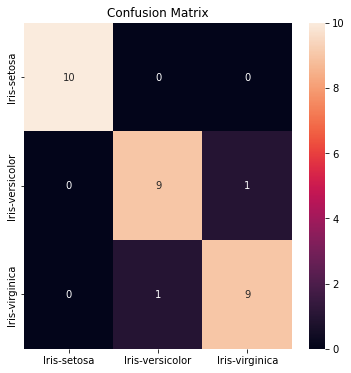

In [106]:
plt.figure(figsize = (6,6))
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot = True, xticklabels = np.unique(Y_test), yticklabels = np.unique(Y_test))
plt.show()

In [107]:
print(classification_report(Y_test,Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

